In [1]:
import numpy as np
import pandas as pd

In [2]:
df_s = pd.DataFrame(dict(v1 = [100, 200, 300],
                         v2 = [400, 500, 600],
                         shape = ["A", "B", "C"]))
df_s

v1   v2 shape
0  100  400     A
1  200  500     B
2  300  600     C

In [3]:
df_s.v1

0    100
1    200
2    300
Name: v1, dtype: int64

In [4]:
df_s.shape

(3, 3)

In [5]:
df_s["shape"]

0    A
1    B
2    C
Name: shape, dtype: object

In [6]:
df_s.iloc[:2, ]

v1   v2 shape
0  100  400     A
1  200  500     B

In [7]:
df_s.loc[:2, ]

v1   v2 shape
0  100  400     A
1  200  500     B
2  300  600     C

In [8]:
df_s["shape"] == "B"

0    False
1     True
2    False
Name: shape, dtype: bool

* 필터링: https://datadoctorblog.com/2023/04/08/Py-Basic-Pandas-Filtering/

In [9]:
df_s.loc[df_s["shape"] == "B", ]

v1   v2 shape
1  200  500     B

In [10]:
df_s.loc[df_s["shape"] != "B", ]

v1   v2 shape
0  100  400     A
2  300  600     C

In [ ]:
df_s.loc[(df_s["shape"] == "B") | (df_s["shape"] == "C"), ]

In [ ]:
df_s.loc[df_s["shape"].isin(["B", "C"]), ]

In [ ]:
condi_1 = df_s["shape"] == "B"
condi_2 = df_s["shape"] == "C"
df_s.loc[condi_1 | condi_2, ]

In [14]:
df = pd.read_csv("krx_202105_utf8.csv")
df.head(2)

지수명        종가     대비   등락률        시가        고가        저가        거래량  \
0  KRX 300   1901.05 -11.63 -0.61   1913.15   1929.94   1896.65  279548840   
1  KTOP 30  11520.28 -86.30 -0.74  11609.44  11702.14  11490.84   50048566   

             거래대금            상장시가총액        날짜  
0  13488481375036  2028800954161500  20210503  
1   5645660149606  1208343758559140  20210503

In [17]:
df["지수명"].unique()

array(['KRX 300', 'KTOP 30', 'KRX 100', 'KRX Mid 200', 'KRX 자동차',
       'KRX 반도체', 'KRX 헬스케어', 'KRX 은행', 'KRX 에너지화학', 'KRX 철강', 'KRX 방송통신',
       'KRX 건설', 'KRX 증권', 'KRX 기계장비', 'KRX 보험', 'KRX 운송', 'KRX 경기소비재',
       'KRX 필수소비재', 'KRX 미디어&엔터테인먼트', 'KRX 정보기술', 'KRX 유틸리티',
       'KRX 300 정보기술', 'KRX 300 금융', 'KRX 300 자유소비재', 'KRX 300 산업재',
       'KRX 300 헬스케어', 'KRX 300 커뮤니케이션서비스', 'KRX 300 소재', 'KRX 300 필수소비재'],
      dtype=object)

In [19]:
df_sub = df.loc[df["지수명"] == "KRX 300", ]
df_sub.head(2)

지수명       종가     대비   등락률       시가       고가       저가        거래량  \
0   KRX 300  1901.05 -11.63 -0.61  1913.15  1929.94  1896.65  279548840   
29  KRX 300  1916.40  15.35  0.81  1903.57  1916.40  1892.36  244040965   

              거래대금            상장시가총액        날짜  
0   13488481375036  2028800954161500  20210503  
29  11708937073166  2043945386926060  20210504

In [22]:
df.loc[df["종가"] == df["종가"].max(), ["지수명", "종가", "날짜"]]

지수명        종가        날짜
117  KTOP 30  11869.29  20210510

In [23]:
df["종가"].idxmax()

117

In [24]:
df.loc[117, ["지수명", "종가", "날짜"]]

지수명     KTOP 30
종가     11869.29
날짜     20210510
Name: 117, dtype: object

In [25]:
df.loc[[117], ["지수명", "종가", "날짜"]]

지수명        종가        날짜
117  KTOP 30  11869.29  20210510

In [26]:
df.loc[df["종가"].idxmax(), ["지수명", "종가", "날짜"]]

지수명     KTOP 30
종가     11869.29
날짜     20210510
Name: 117, dtype: object

In [27]:
df.loc[[df["종가"].idxmax()], ["지수명", "종가", "날짜"]]

지수명        종가        날짜
117  KTOP 30  11869.29  20210510

* 결측치 처리: https://datadoctorblog.com/2023/04/24/Py-Basic-Pandas-Missing/

In [28]:
df = pd.read_csv("iris_missing.csv")
df.head(2)

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          NaN           NaN          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa

In [30]:
df_sub = df.head()
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  5 non-null      float64
 1   Sepal.Width   4 non-null      float64
 2   Petal.Length  4 non-null      float64
 3   Petal.Width   5 non-null      float64
 4   Species       5 non-null      object 
dtypes: float64(4), object(1)
memory usage: 328.0+ bytes


In [31]:
df_sub.count() # 엑셀의 COUNTA() 함수와 같음.

Sepal.Length    5
Sepal.Width     4
Petal.Length    4
Petal.Width     5
Species         5
dtype: int64

In [33]:
len(df_sub) - df_sub.count() # 결측값 개수

Sepal.Length    0
Sepal.Width     1
Petal.Length    1
Petal.Width     0
Species         0
dtype: int64

In [34]:
df_sub.isna().sum() # 🌟🌟🌟🌟🌟

Sepal.Length    0
Sepal.Width     1
Petal.Length    1
Petal.Width     0
Species         0
dtype: int64

In [ ]:
df_sub.loc[df_sub["Sepal.Width"].isna(), ]

In [ ]:
df_sub.loc[df_sub["Sepal.Width"].notna(), ]

In [ ]:
df_sub.dropna()

In [38]:
df_sub["Sepal.Width"] = df_sub["Sepal.Width"].fillna(-999)
df_sub["Petal.Length"] = df_sub["Petal.Length"].fillna(df_sub["Petal.Length"].mean())

C:\Users\Encaion\AppData\Local\Temp\ipykernel_18916\1739428370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub["Sepal.Width"] = df_sub["Sepal.Width"].fillna(-999)
C:\Users\Encaion\AppData\Local\Temp\ipykernel_18916\1739428370.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub["Petal.Length"] = df_sub["Petal.Length"].fillna(df_sub["Petal.Length"].mean())


In [39]:
df_sub

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1       -999.0           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

### 인덱스 관련

In [40]:
df_sub2 = df.head().copy()
df_sub2["Sepal.Width"] = df_sub2["Sepal.Width"].fillna(-999)
df_sub2["Petal.Length"] = df_sub2["Petal.Length"].fillna(df_sub2["Petal.Length"].mean())
df_sub2

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1       -999.0           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

.set_index()와 .reset_index()를 연쇄(method chaining)로 썼을 때 (기존의 인덱스가 필요 없는 경우) 지정한 변수를 가장 앞쪽으로 옮길 수 있음. 이 작업은 머신러닝 모델링시 종속변수를 가장 앞으로 옮길 때 매우 유용하게 사용 가능.

In [41]:
df_sub2.set_index("Species").reset_index() 

Species  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0  setosa           5.1       -999.0           1.4          0.2
1  setosa           4.9          3.0           1.4          0.2
2  setosa           4.7          3.2           1.3          0.2
3  setosa           4.6          3.1           1.5          0.2
4  setosa           5.0          3.6           1.4          0.2

* 원소/조합 세기: https://datadoctorblog.com/2023/04/04/Py-Basic-Pandas-Counting/

In [42]:
df = pd.read_csv("bike.csv")
df.head(1)

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16

In [43]:
df["season"].unique()

array([1, 2, 3, 4], dtype=int64)

In [44]:
df["season"].nunique()

4

In [45]:
df["season"].value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

In [46]:
df["season"].value_counts(normalize = True)

season
4    0.251148
2    0.251056
3    0.251056
1    0.246739
Name: proportion, dtype: float64

* crosstab(): https://datadoctorblog.com/2023/05/06/Py-Basic-Pandas-Crosstab/

In [47]:
pd.crosstab(df["season"], df["holiday"])

holiday     0   1
season           
1        2615  71
2        2685  48
3        2637  96
4        2638  96

In [48]:
sum((df["season"] == 1) & (df["holiday"] == 0))

2615

In [49]:
pd.crosstab(df["season"], df["holiday"], normalize = "index")

holiday         0         1
season                     
1        0.973567  0.026433
2        0.982437  0.017563
3        0.964874  0.035126
4        0.964887  0.035113

In [52]:
pd.crosstab(df["season"], df["holiday"],
            values = df["count"],
            aggfunc = "mean")

holiday           0           1
season                         
1        117.494837   73.929577
2        215.562756  197.833333
3        234.293136  237.822917
4        198.560273  210.750000

* .groupby(): https://datadoctorblog.com/2023/04/28/Py-Basic-Pandas-Groupby/

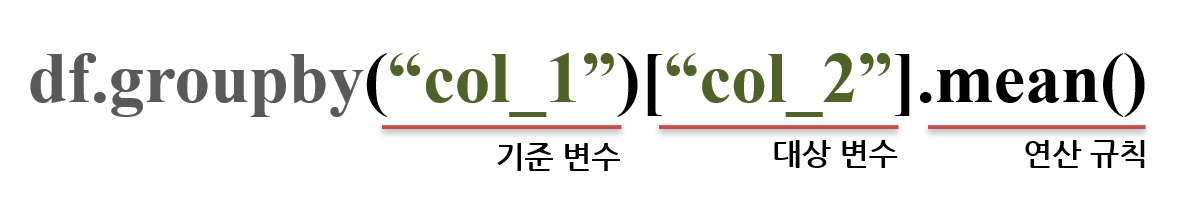

In [55]:
df.groupby(["season", "holiday"])["count"].mean()

season  holiday
1       0          117.494837
        1           73.929577
2       0          215.562756
        1          197.833333
3       0          234.293136
        1          237.822917
4       0          198.560273
        1          210.750000
Name: count, dtype: float64

In [54]:
df.pivot_table(index = "season", columns = "holiday",
               values = "count", 
               aggfunc = "mean")

holiday           0           1
season                         
1        117.494837   73.929577
2        215.562756  197.833333
3        234.293136  237.822917
4        198.560273  210.750000

In [56]:
df = pd.read_csv("diamonds.csv")
df.head(2)

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31

In [58]:
df.groupby("cut")["price"].agg(["max", "min"])

max  min
cut                  
Fair       18574  337
Good       18788  327
Ideal      18806  326
Premium    18823  326
Very Good  18818  336

In [ ]:
df.groupby(["cut", "color"])["price"].agg(["max", "min"])

In [ ]:
df.groupby("cut")[["price", "table"]].agg(["max", "min"])

In [ ]:
df.groupby("cut")[["price", "table"]].agg({"price": "min",
                                           "table": "max"})

* 신규변수 생성: https://datadoctorblog.com/2023/04/12/Py-Basic-Pandas-New-Columns/

* 문자열 데이터 처리: https://datadoctorblog.com/2023/04/20/Py-Basic-Pandas-String-Data/

In [61]:
df_t = pd.DataFrame(dict(v1 = [100, 200, 300],
                         v2 = ["abc", "bbb", "cba"], 
                         v3 = [123, "1234-5678", "010-1234-5678"]))
df_t

v1   v2             v3
0  100  abc            123
1  200  bbb      1234-5678
2  300  cba  010-1234-5678

In [62]:
df_t["v2"].replace("a", "❌")

0    abc
1    bbb
2    cba
Name: v2, dtype: object

In [63]:
df_t["v2"].replace("abc", "❌")

0      ❌
1    bbb
2    cba
Name: v2, dtype: object

In [64]:
df_t["v2"].replace({"abc": "❌", "cba": "❤"})

0      ❌
1    bbb
2      ❤
Name: v2, dtype: object

In [65]:
df_t["v2"].str.replace("a", "@")

0    @bc
1    bbb
2    cb@
Name: v2, dtype: object

In [66]:
df_t["v2"].str.replace(pat = "a", repl = "") # pattern, replacement

0     bc
1    bbb
2     cb
Name: v2, dtype: object

In [67]:
df_t["v2"].str.replace("abc", "@")

0      @
1    bbb
2    cba
Name: v2, dtype: object

In [68]:
df_t["v2"].str.contains("a")

0     True
1    False
2     True
Name: v2, dtype: bool

In [70]:
df_t.loc[df_t["v2"].str.contains("a"), ]

v1   v2             v3
0  100  abc            123
2  300  cba  010-1234-5678

In [71]:
df_t.loc[~df_t["v2"].str.contains("a"), ] # ~ 는 True, False 반전

v1   v2         v3
1  200  bbb  1234-5678

In [72]:
df_t.loc[df_t["v2"].str.contains("^[^a]+?$"), ] # 정규표현식으로 위 패턴을 반전시키려면 매우 어려움

v1   v2         v3
1  200  bbb  1234-5678

In [73]:
df_t.loc[df_t["v2"].isin(["abc", "bbb"]), ]

v1   v2         v3
0  100  abc        123
1  200  bbb  1234-5678

In [74]:
df_t.loc[~df_t["v2"].isin(["abc", "bbb"]), ]

v1   v2             v3
2  300  cba  010-1234-5678

In [75]:
df_t["v3"]

0              123
1        1234-5678
2    010-1234-5678
Name: v3, dtype: object

In [78]:
df_t["v3"].str.split("-")

0                  NaN
1         [1234, 5678]
2    [010, 1234, 5678]
Name: v3, dtype: object

In [79]:
df_t["v3"].astype("str").str.split("-")

0                [123]
1         [1234, 5678]
2    [010, 1234, 5678]
Name: v3, dtype: object

In [80]:
df_t["v3"].astype("str").str.split("-").explode()

0     123
1    1234
1    5678
2     010
2    1234
2    5678
Name: v3, dtype: object

In [87]:
df_t_v3 = df_t["v3"].astype("str").str.split("-", expand = True)
df_t_v3

0     1     2
0   123  None  None
1  1234  5678  None
2   010  1234  5678

In [88]:
df_t_v3.fillna("🤔")

0     1     2
0   123     🤔     🤔
1  1234  5678     🤔
2   010  1234  5678

 > **기출유형**: 변수의 접두사/접미사 추가하기.

In [89]:
df_t_v3.add_prefix("col_")

col_0 col_1 col_2
0   123  None  None
1  1234  5678  None
2   010  1234  5678

In [90]:
df_t_v3.add_suffix("_s")

0_s   1_s   2_s
0   123  None  None
1  1234  5678  None
2   010  1234  5678

In [91]:
df_t["v3"].str.len()

0     NaN
1     9.0
2    13.0
Name: v3, dtype: float64

* 시간 데이터 처리: https://datadoctorblog.com/2023/04/14/Py-Basic-Pandas-Time-Data/

In [93]:
ser_t1 = pd.Series(["2023-11-01", "2023-11-02", "2023-11-03"])
ser_t2 = pd.Series(["2023년 11월 01일", "2023년 11월 02일", "2023년 11월 03일"])
ser_t3 = pd.Series([123456, 234567, 345678])

In [ ]:
pd.to_datetime(ser_t1)

In [98]:
# pd.to_datetime(ser_t2) # 에러 발생!!

https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [99]:
pd.to_datetime(ser_t2, format = "%Y년 %m월 %d일")

0   2023-11-01
1   2023-11-02
2   2023-11-03
dtype: datetime64[ns]

In [100]:
pd.to_datetime(ser_t3)

0   1970-01-01 00:00:00.000123456
1   1970-01-01 00:00:00.000234567
2   1970-01-01 00:00:00.000345678
dtype: datetime64[ns]

In [101]:
pd.to_datetime(ser_t3, unit = "s")

0   1970-01-02 10:17:36
1   1970-01-03 17:09:27
2   1970-01-05 00:01:18
dtype: datetime64[ns]

In [102]:
pd.to_datetime(ser_t3, unit = "s", origin = "2023-11-01")

0   2023-11-02 10:17:36
1   2023-11-03 17:09:27
2   2023-11-05 00:01:18
dtype: datetime64[ns]

In [104]:
df = pd.read_csv("bike.csv")
df_time = df[["datetime"]].copy()
df_time.head(2)

datetime
0  2011-01-01 00:00:00
1  2011-01-01 01:00:00

In [105]:
df_time["datetime"] = pd.to_datetime(df_time["datetime"])
df_time["year"  ] = df_time["datetime"].dt.year
df_time["month" ] = df_time["datetime"].dt.month
df_time["date"  ] = df_time["datetime"].dt.date
df_time["yyyymm"] = df_time["datetime"].dt.strftime("%Y%m")
df_time["wday"  ] = df_time["datetime"].dt.weekday # 5, 6이 토, 일
df_time["wend"  ] = np.where(df_time["wday"] >= 5, 1, 0) # 주말이면 1, 평일은 0
df_time["hour"  ] = df_time["datetime"].dt.hour
df_time["shift" ] = df_time["datetime"] + pd.to_timedelta(9, unit = "h")

In [106]:
df_time.head(3)

datetime  year  month        date  yyyymm  wday  wend  hour  \
0 2011-01-01 00:00:00  2011      1  2011-01-01  201101     5     1     0   
1 2011-01-01 01:00:00  2011      1  2011-01-01  201101     5     1     1   
2 2011-01-01 02:00:00  2011      1  2011-01-01  201101     5     1     2   

                shift  
0 2011-01-01 09:00:00  
1 2011-01-01 10:00:00  
2 2011-01-01 11:00:00

In [122]:
df_d = pd.DataFrame(dict(date = pd.date_range(start = "2023-11-01", 
                                              end = "2023-11-7",
                                              freq = "D"),
                         v = [100, 200, 300, np.nan, 500, 600, 700]))
df_d["v_s1"] = df_d["v"].shift(1)
df_d["v_s2"] = df_d["v"].shift(2)
df_d["v_sn1"] = df_d["v"].shift(-1)
df_d

date      v   v_s1   v_s2  v_sn1
0 2023-11-01  100.0    NaN    NaN  200.0
1 2023-11-02  200.0  100.0    NaN  300.0
2 2023-11-03  300.0  200.0  100.0    NaN
3 2023-11-04    NaN  300.0  200.0  500.0
4 2023-11-05  500.0    NaN  300.0  600.0
5 2023-11-06  600.0  500.0    NaN  700.0
6 2023-11-07  700.0  600.0  500.0    NaN

> **기출 유형**: 변수 "v"의 결측치를 직전값과 직후값의 평균으로 대치하시오.   
> ※ 단, 결측치는 연속으로 존재하지 않음

In [124]:
df_d["v_fill1"] = np.where(df_d["v"].isna(), (df_d["v_s1"] + df_d["v_sn1"]) / 2, df_d["v"])
df_d["v_fill2"] = df_d["v"].interpolate() # 기본적으로 선형보간법으로 동작
df_d

date      v   v_s1   v_s2  v_sn1  v_fill1  v_fill2
0 2023-11-01  100.0    NaN    NaN  200.0    100.0    100.0
1 2023-11-02  200.0  100.0    NaN  300.0    200.0    200.0
2 2023-11-03  300.0  200.0  100.0    NaN    300.0    300.0
3 2023-11-04    NaN  300.0  200.0  500.0    400.0    400.0
4 2023-11-05  500.0    NaN  300.0  600.0    500.0    500.0
5 2023-11-06  600.0  500.0    NaN  700.0    600.0    600.0
6 2023-11-07  700.0  600.0  500.0    NaN    700.0    700.0

* .melt(): https://datadoctorblog.com/2023/05/07/Py-Basic-Pandas-Melt/

In [125]:
df_e = pd.read_csv("elec_load_2017_7d.csv")
df_e.head(1)

YEAR  MONTH  DAY   X1HR   X2HR   X3HR   X4HR   X5HR   X6HR   X7HR  ...  \
0  2017      1    1  60178  57862  56165  55135  54450  54401  54147  ...   

   X15HR  X16HR  X17HR  X18HR  X19HR  X20HR  X21HR  X22HR  X23HR  X24HR  
0  49213  49357  50362  53115  55205  55437  55348  55790  58195  59330  

[1 rows x 27 columns]

In [126]:
df_e_m = df_e.melt(id_vars = ["YEAR", "MONTH", "DAY"])
df_e_m.head(2)

YEAR  MONTH  DAY variable  value
0  2017      1    1     X1HR  60178
1  2017      1    2     X1HR  57067

In [127]:
df_e_m = df_e.melt(id_vars = ["YEAR", "MONTH", "DAY"],
                   var_name = "HOUR",
                   value_name = "LOAD")
df_e_m.head(2)

YEAR  MONTH  DAY  HOUR   LOAD
0  2017      1    1  X1HR  60178
1  2017      1    2  X1HR  57067

In [128]:
df_e_m = df_e.melt(id_vars = df_e.columns[:3],
                   var_name = "HOUR",
                   value_name = "LOAD")
df_e_m.head(2)

YEAR  MONTH  DAY  HOUR   LOAD
0  2017      1    1  X1HR  60178
1  2017      1    2  X1HR  57067

In [129]:
df_e_m["h1"] = df_e_m["HOUR"].str.replace("X", "")
df_e_m["h1"] = df_e_m["h1"].str.replace("HR", "")
df_e_m["h2"] = df_e_m["HOUR"].str.replace("X|HR", "", regex = True) # X 또는 HR 🌟✨
df_e_m["h3"] = df_e_m["HOUR"].str.replace("[A-Z]", "", regex = True) # 영문 대문자
df_e_m["h4"] = df_e_m["HOUR"].str.replace("[^0-9]", "", regex = True) # 숫자를 제외한 나머지 모든 문자

In [130]:
df_e_m.head(3)

YEAR  MONTH  DAY  HOUR   LOAD h1 h2 h3 h4
0  2017      1    1  X1HR  60178  1  1  1  1
1  2017      1    2  X1HR  57067  1  1  1  1
2  2017      1    3  X1HR  66263  1  1  1  1

* pivoting: https://datadoctorblog.com/2023/05/10/Py-Basic-Pandas-Pivoting/

In [131]:
df_e_m.pivot_table(index = ["YEAR", "MONTH", "DAY"], 
                   columns = "HOUR", 
                   values = "LOAD")

HOUR              X10HR    X11HR    X12HR    X13HR    X14HR    X15HR    X16HR  \
YEAR MONTH DAY                                                                  
2017 1     1    49572.0  50034.0  50026.0  49515.0  49365.0  49213.0  49357.0   
           2    70869.0  72867.0  73115.0  69165.0  71429.0  72228.0  71945.0   
           3    75999.0  76522.0  76019.0  72203.0  74725.0  75576.0  75168.0   
           4    76175.0  76375.0  75862.0  72288.0  74360.0  74977.0  74275.0   
           5    66806.0  68030.0  67878.0  64439.0  64986.0  64767.0  63613.0   
           6    55679.0  56548.0  56435.0  55563.0  55759.0  55408.0  55256.0   
           7    75383.0  74984.0  74066.0  70335.0  72507.0  73064.0  72466.0   

HOUR              X17HR    X18HR    X19HR  ...    X23HR    X24HR     X2HR  \
YEAR MONTH DAY                             ...                              
2017 1     1    50362.0  53115.0  55205.0  ...  58195.0  59330.0  57862.0   
           2    72641.0  73387.0  72294.0  ...  67435.0  69275.0  55148.0   
           3    75791.0  75922.0  75469.0  ...  69593.0  71346.0  64233.0   
           4    74909.0  75344.0  74504.0  ...  68948.0  70834.0  66143.0   
           5    63095.0  63230.0  64253.0  ...  64350.0  66687.0  65801.0   
           6    56000.0  58322.0  60456.0  ...  62288.0  63214.0  62010.0   
           7    73274.0  73844.0  73287.0  ...  67697.0  69219.0  58974.0   

HOUR               X3HR     X4HR     X5HR     X6HR     X7HR     X8HR     X9HR  
YEAR MONTH DAY                                                                 
2017 1     1    56165.0  55135.0  54450.0  54401.0  54147.0  52467.0  50469.0  
           2    53983.0  53571.0  54027.0  55388.0  57753.0  60781.0  66494.0  
           3    63194.0  62461.0  62649.0  63396.0  65098.0  67745.0  72982.0  
           4    65051.0  64245.0  64152.0  64678.0  66494.0  68851.0  73835.0  
           5    64439.0  63437.0  63135.0  63250.0  63658.0  63441.0  65640.0  
           6    60783.0  59779.0  59398.0  59296.0  58984.0  57533.0  56159.0  
           7    57845.0  57387.0  57749.0  58794.0  60869.0  64665.0  71544.0  

[7 rows x 24 columns]

In [132]:
df_e_m.pivot(index = ["YEAR", "MONTH", "DAY"], 
                   columns = "HOUR", 
                   values = "LOAD")

HOUR            X10HR  X11HR  X12HR  X13HR  X14HR  X15HR  X16HR  X17HR  X18HR  \
YEAR MONTH DAY                                                                  
2017 1     1    49572  50034  50026  49515  49365  49213  49357  50362  53115   
           2    70869  72867  73115  69165  71429  72228  71945  72641  73387   
           3    75999  76522  76019  72203  74725  75576  75168  75791  75922   
           4    76175  76375  75862  72288  74360  74977  74275  74909  75344   
           5    66806  68030  67878  64439  64986  64767  63613  63095  63230   
           6    55679  56548  56435  55563  55759  55408  55256  56000  58322   
           7    75383  74984  74066  70335  72507  73064  72466  73274  73844   

HOUR            X19HR  ...  X23HR  X24HR   X2HR   X3HR   X4HR   X5HR   X6HR  \
YEAR MONTH DAY         ...                                                    
2017 1     1    55205  ...  58195  59330  57862  56165  55135  54450  54401   
           2    72294  ...  67435  69275  55148  53983  53571  54027  55388   
           3    75469  ...  69593  71346  64233  63194  62461  62649  63396   
           4    74504  ...  68948  70834  66143  65051  64245  64152  64678   
           5    64253  ...  64350  66687  65801  64439  63437  63135  63250   
           6    60456  ...  62288  63214  62010  60783  59779  59398  59296   
           7    73287  ...  67697  69219  58974  57845  57387  57749  58794   

HOUR             X7HR   X8HR   X9HR  
YEAR MONTH DAY                       
2017 1     1    54147  52467  50469  
           2    57753  60781  66494  
           3    65098  67745  72982  
           4    66494  68851  73835  
           5    63658  63441  65640  
           6    58984  57533  56159  
           7    60869  64665  71544  

[7 rows x 24 columns]

* concat(): https://datadoctorblog.com/2023/05/22/Py-Basic-Pandas-Merge/#concat

In [133]:
df = pd.read_csv("bike.csv")
df.head(2)

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40

In [134]:
df1 = df.iloc[:3, :3]
df2 = df.iloc[-3:, :3]
df3 = df.iloc[-3:, -3:]

In [138]:
pd.concat([df1, df2])

In [ ]:
pd.concat([df1, df2], axis = 1)

In [ ]:
pd.concat([df1, df2.reset_index(drop = True)], axis = 1)

In [ ]:
pd.concat([df1, df2.reset_index(drop = True).add_suffix("_2")], axis = 1)

In [ ]:
pd.concat([df1, df3])

In [145]:
# pd.concat([df1, df3.values])
pd.concat([df1, df3], ignore_index = True)

datetime  season  holiday  casual  registered  count
0  2011-01-01 00:00:00     1.0      0.0     NaN         NaN    NaN
1  2011-01-01 01:00:00     1.0      0.0     NaN         NaN    NaN
2  2011-01-01 02:00:00     1.0      0.0     NaN         NaN    NaN
3                  NaN     NaN      NaN     4.0       164.0  168.0
4                  NaN     NaN      NaN    12.0       117.0  129.0
5                  NaN     NaN      NaN     4.0        84.0   88.0

* merge(): https://datadoctorblog.com/2023/05/22/Py-Basic-Pandas-Merge/#merge

In [146]:
df = pd.read_csv("krx_202105_utf8.csv")
df.head(2)

지수명        종가     대비   등락률        시가        고가        저가        거래량  \
0  KRX 300   1901.05 -11.63 -0.61   1913.15   1929.94   1896.65  279548840   
1  KTOP 30  11520.28 -86.30 -0.74  11609.44  11702.14  11490.84   50048566   

             거래대금            상장시가총액        날짜  
0  13488481375036  2028800954161500  20210503  
1   5645660149606  1208343758559140  20210503

> **기출 유형**: 날짜별 등락률의 값이 최대값에 해당하는 지수명

In [149]:
df_q = df[["날짜", "등락률", "지수명"]].copy()
# df_q["날짜"] = pd.to_datetime(df_q["날짜"]) # xx
df_q["날짜"] = pd.to_datetime(df_q["날짜"].astype("str"))
df_q.head(2)

날짜   등락률      지수명
0 2021-05-03 -0.61  KRX 300
1 2021-05-03 -0.74  KTOP 30

In [153]:
df_q_g = df_q.groupby("날짜")["등락률"].max().reset_index()
df_q_g.head(2)

날짜   등락률
0 2021-05-03  2.12
1 2021-05-04  1.92

In [155]:
df_q_join = df_q_g.merge(df_q, on = ["날짜", "등락률"], how = "inner")
df_q_join.head()

날짜   등락률           지수명
0 2021-05-03  2.12       KRX 자동차
1 2021-05-04  1.92     KRX 에너지화학
2 2021-05-06  5.76        KRX 은행
3 2021-05-07  3.02  KRX 300 헬스케어
4 2021-05-10  3.42        KRX 증권

#### lambda 함수 + 사용자 정의 함수

In [157]:
df = pd.read_csv("bike.csv")

In [160]:
df.groupby("season")["count"].agg(lambda x: x.max())

season
1    801
2    873
3    977
4    948
Name: count, dtype: int64

In [ ]:
df.groupby("season")["count"].max()

In [ ]:
df.groupby("season")["count"].agg("max")

In [ ]:
def udf_max(x):
    return x.max()

df.groupby("season")["count"].agg(udf_max)

In [166]:
x = df.loc[df["season"] == 1, "count"]
x = df.loc[df["season"] == 2, "count"]
x = df.loc[df["season"] == 3, "count"]
x = df.loc[df["season"] == 4, "count"]

#### 정규표현식

In [167]:
ser_m = pd.Series(["1234원", "1.23$", "1,345억", "-3523"])
ser_m

0     1234원
1     1.23$
2    1,345억
3     -3523
dtype: object

In [ ]:
ser_m.str.replace("원", "")

In [ ]:
ser_m.str.replace("원|억", "")

In [174]:
ser_m.str.replace("원|억", "", regex = True)

In [175]:
ser_m.str.replace("원|$", "", regex = True)

0      1234
1     1.23$
2    1,345억
3     -3523
dtype: object

In [176]:
ser_m.str.replace("원|\$", "", regex = True)

0      1234
1      1.23
2    1,345억
3     -3523
dtype: object

In [177]:
ser_m.str.replace("[^0-9]", "", regex = True)

0    1234
1     123
2    1345
3    3523
dtype: object

In [180]:
ser_m.str.replace("[^0-9-.]", "", regex = True)

0     1234
1     1.23
2     1345
3    -3523
dtype: object

In [181]:
ser_m2 = ser_m.str.replace("[^0-9-.]", "", regex = True)
ser_m2 = ser_m2.astype("float")
ser_m2

0    1234.00
1       1.23
2    1345.00
3   -3523.00
dtype: float64

In [182]:
np.where(ser_m.str.contains("\$"), ser_m2 * 1300, ser_m2)

array([ 1234.,  1599.,  1345., -3523.])